# Load the tests to compare

In [10]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

__file__ = globals()['_dh'][0]

# get an absolute path to the directory that contains parent files
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 67
start_test = 0
end_test = 38
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
tests_types:
 ['PG', 'PG', 'PG', 'PG', 'PG', 'A2C', 'A2C', 'A2C', 'A2C', 'A2C', 'A3C', 'A3C', 'A3C', 'A3C', 'A3C', 'PPO', 'PPO', 'PPO', 'PPO', 'PPO', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'PG', 'PG', 'PG', 'PG', 'PG', 'A2C', 'A2C', 'A2C', 'A2C', 'A2C', 'binpacking', 'latency_greedy', 'A3C']


# Necessary stats of a test

In [11]:
final_stats = []
for test_id in range(start_test, end_test):
    users_distances_episodes_average = [episode['users_distances'].mean() for episode in tests[test_id]['episodes']]
    users_distances_test_average = sum(users_distances_episodes_average) / len(users_distances_episodes_average)
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)
    # print(users_distances_episodes_average)
    # print(users_distances_test_average)
    # print(num_consolidated_episodes_average)
    # print(num_consolidated_test_average)
    final_stats.append({
        'test_id': test_id,
        # 'checkpoint': tests[test_id]['info']['checkpoint'],
        'network_id': tests[test_id]['info']['network_id'],
        'trace_id_test': tests[test_id]['info']['trace_id_test'],
        'sample_episode_users_distances': tests[test_id]['episodes'][0]['users_distances'],
        'sample_episode_num_consolidated': tests[test_id]['episodes'][0]['num_consolidated'],
        # 'experiments': tests[test_id]['info']['experiments'],
        'penalty_latency': tests[test_id]['info']['penalty_latency'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'users_distances_test_average': users_distances_test_average,
        'num_consolidated_test_average': num_consolidated_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

In [12]:
tests[test_id]['info']

{'series': 67,
 'dataset_id': 6,
 'workload_id': 0,
 'network_id': 5,
 'trace_id': 2,
 'trace_id_test': 2,
 'checkpoint': 2296,
 'experiment_str': 'A3C_SimEdgeEnv_11a33_00000_0_penalty_latency=2_2021-12-14_22-13-30',
 'experiments': 2,
 'episode_length': 3453,
 'num_episodes': 20,
 'algorithm': 'A3C',
 'penalty_latency': 2,
 'penalty_consolidated': 4,
 'num_workers': 4}

# compare tests - tables

In [13]:
final_stats_df

,test_id,network_id,trace_id_test,sample_episode_users_distances,sample_episode_num_consolidated,penalty_latency,penalalty_consolidated,users_distances_test_average,num_consolidated_test_average,test_types
0,0,5,0,0 1.147935 1 1.044719 2 1.05...,0 4 1 5 2 5 3 5 4 ...,2,4,1.217719,4.996177,PG
1,1,5,0,0 1.360284 1 1.265372 2 1.17...,0 4 1 5 2 5 3 5 4 ...,4,4,1.279426,4.984941,PG
2,2,5,0,0 1.260160 1 1.243183 2 1.15...,0 5 1 6 2 6 3 6 4 ...,6,4,1.295522,5.995468,PG
3,3,5,0,0 1.376771 1 1.320536 2 1.23...,0 5 1 6 2 6 3 6 4 ...,8,4,1.313729,5.996090,PG
4,4,5,0,0 1.376771 1 1.320536 2 1.23...,0 5 1 6 2 6 3 6 4 ...,10,4,1.313853,5.994469,PG
5,5,5,0,0 1.354242 1 1.188020 2 1.19...,0 3 1 5 2 6 3 5 4 ...,2,4,1.610711,4.659991,A2C
6,6,5,0,0 1.355552 1 1.130958 2 1.27...,0 3 1 3 2 6 3 6 4 ...,4,4,1.975731,3.999522,A2C
7,7,5,0,0 1.280693 1 1.084317 2 1.12...,0 3 1 4 2 5 3 5 4 ...,6,4,1.910839,3.559123,A2C
8,8,5,0,0 1.410715 1 1.359455 2 1.43...,0 2 1 2 2 1 3 2 4 ...,8,4,2.040270,3.760990,A2C
9,9,5,0,0 1.266444 1 1.248885 2 1.20...,0 3 1 4 2 5 3 5 4 ...,10,4,1.991491,3.762395,A2C


In [14]:
trace_id_test = 0
penalty_latency = 6

In [15]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=[
        'users_distances_test_average'], ascending=False)[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]


,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
17,PPO,6,2.328704,4.990747
35,binpacking,10,2.273855,6.000000
22,IMPALA,6,1.317691,5.999334
2,PG,6,1.295522,5.995468
36,latency_greedy,10,0.898404,3.302635


In [16]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=[
        'num_consolidated_test_average'])[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]

,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
36,latency_greedy,10,0.898404,3.302635
17,PPO,6,2.328704,4.990747
2,PG,6,1.295522,5.995468
22,IMPALA,6,1.317691,5.999334
35,binpacking,10,2.273855,6.000000


In [17]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy'))].sort_values(by=[
        'users_distances_test_average'], ascending=False)[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]


,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
17,PPO,6,2.328704,4.990747
35,binpacking,10,2.273855,6.000000
7,A2C,6,1.910839,3.559123
12,A3C,6,1.544837,2.768173
22,IMPALA,6,1.317691,5.999334
2,PG,6,1.295522,5.995468
36,latency_greedy,10,0.898404,3.302635


In [18]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy'))].sort_values(by=[
        'num_consolidated_test_average'])[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]

,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
12,A3C,6,1.544837,2.768173
36,latency_greedy,10,0.898404,3.302635
7,A2C,6,1.910839,3.559123
17,PPO,6,2.328704,4.990747
2,PG,6,1.295522,5.995468
22,IMPALA,6,1.317691,5.999334
35,binpacking,10,2.273855,6.000000


# Findings
1. A2C and A3C results are not explainable in both trainnig and testing
2. The ordering for consolidation is in most casses (only not in latency=2) latency_greedy<PG<PPO<IMPALA<binpacking
3. The ordering for latency is in most cases binpacking<PPO<IMPALA<PG<latency_greedy

# compare tests - plots

<AxesSubplot:xlabel='test_types'>

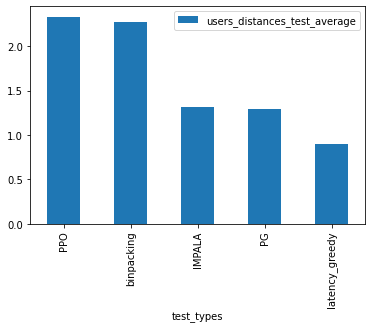

In [19]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df[
        'test_types'] != 'A2C')].sort_values(by=['users_distances_test_average'], ascending=False).plot.bar(x='test_types', y='users_distances_test_average')


<AxesSubplot:xlabel='test_types'>

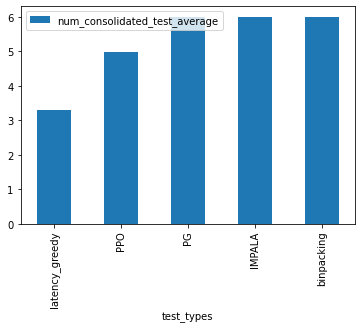

In [20]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average']).plot.bar(x='test_types', y='num_consolidated_test_average')


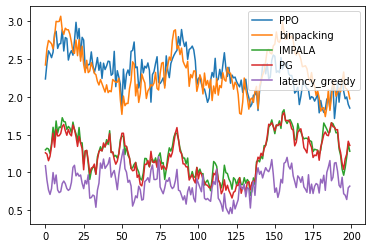

In [21]:
episodes_users_distances = final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['users_distances_test_average'], ascending=False)[['sample_episode_users_distances', 'test_types']]

for _, row in episodes_users_distances.iterrows():
    plt.plot(row['sample_episode_users_distances'][:200], label=row['test_types'])
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
plt.show()


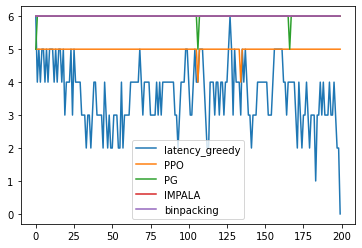

In [22]:
epidsodes_num_consolidated = final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average'])[['sample_episode_num_consolidated', 'test_types']]
for _, row in epidsodes_num_consolidated.iterrows():
    plt.plot(row['sample_episode_num_consolidated'][:200], label=row['test_types'])
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe num consolidated: {row['sample_episode_num_consolidated'].tolist()}")
plt.show()

